<a href="https://colab.research.google.com/github/sreebalajisree/Fake_News_Detection/blob/main/Fake_News_Detection_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the necessary libararies

In [29]:
#pip install wordcloud

In [30]:
#!pip install texthero
#!pip install plotly
#!pip install Cython

In [31]:
#!pip install -U spacy

In [32]:
import os
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import texthero as hero
from texthero import visualization
#from gensim.models.word2vec import Word2VecKeyedVectors
from wordcloud import WordCloud

Data Pre-Processing

In [33]:
"""Data preprocessing"""

def data_process(data):
    for i, label in enumerate(data['label']):
        if data['label'][i] == "real":
            data['label'][i] = 1
        else:
            data['label'][i] = 0

In [34]:
# Configuration
use_valid = True

In [35]:
"Import the dataset"
"""Read the data from 'data' """

fake_train = pd.read_excel("/content/sample_data/data/Constraint_English_Train.xlsx")
fake_valid = pd.read_excel("/content/sample_data/data/Constraint_English_Val.xlsx")
fake_test = pd.read_excel("/content/sample_data/data/Constraint_English_Test_without_labels.xlsx")
fake_external1 = pd.read_excel("/content/sample_data/data/external_1.xlsx")
fake_external2 = pd.read_excel("/content/sample_data/data/external_2.xlsx")
df_pseudo = pd.read_csv("/content/sample_data/data/pseudo_submission.csv")

Read top 5 values from df_pseudo dataframe

In [36]:
# Read the top 5 values from the df_pseudo
print("Value of df_pseudo data frame")
df_pseudo.head()

Value of df_pseudo data frame


,tweet,label
0,Our daily update is published. States reported...,real
1,Alfalfa is the only cure for COVID-19.,fake
2,President Trump Asked What He Would Do If He W...,fake
3,States reported 630 deaths. We are still seein...,real
4,This is the sixth time a global health emergen...,real


Re-label the 'real', 'fake' as 1,0 using data_process function for df_pseudo dataframe

In [37]:
# Re-label the 'real', 'fake' as 1,0 using data_process function
data_process(df_pseudo)

# Verify the data-frame is changed by printing top 5 values
df_pseudo.head()

,tweet,label
0,Our daily update is published. States reported...,1
1,Alfalfa is the only cure for COVID-19.,0
2,President Trump Asked What He Would Do If He W...,0
3,States reported 630 deaths. We are still seein...,1
4,This is the sixth time a global health emergen...,1


Read the top 5 values from fake_train dataframe

In [38]:
# Read the top 5 values from fake training data frame
print("Values of fake_train data frame")
fake_train.head()

Values of fake_train data frame


,id,tweet,label
0,1.0,The CDC currently reports 99031 deaths. In gen...,real
1,2.0,States reported 1121 deaths a small rise from ...,real
2,3.0,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4.0,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5.0,Populous states can generate large case counts...,real


Read the top 5 values from fake external2 data frame

In [39]:
# Read the top 5 values from fake training external2 data frame
print("Values of fake_train_external2 data frame")
fake_external2.head()

Values of fake_train_external2 data frame


,tweet,label
0,"""Spraying chlorine or alcohol on the skin kill...",0
1,"""Only older adults and young people are at risk""",0
2,"""Children cannot get COVID-19""",0
3,"""COVID-19 is just like the flu""",0
4,"""Everyone with COVID-19 dies""",0


Read the top 5 values from fake test data frame

In [40]:
# Read the top 5 values from fake test data frame
print("Values of fake_test data frame")
fake_test.head()

Values of fake_test data frame


,id,tweet
0,1.0,Our daily update is published. States reported...
1,2.0,Alfalfa is the only cure for COVID-19.
2,3.0,President Trump Asked What He Would Do If He W...
3,4.0,States reported 630 deaths. We are still seein...
4,5.0,This is the sixth time a global health emergen...


In [41]:
fake_train1 = pd.concat([fake_train['tweet'], fake_train['label']], axis=1)
fake_valid1 = pd.concat([fake_valid['tweet'], fake_valid['label']], axis=1)

# Call the data_processing method
data_process(fake_train1)
data_process(fake_valid1)

if use_valid:
    fake_train1 = pd.concat([fake_train1, fake_valid1], ignore_index=True)

In [42]:
# Read the top 5 values from fake train1 data frame
print("Values of fake_train1 data frame")
print(fake_train1.head())

Values of fake_train1 data frame
                                               tweet label
0  The CDC currently reports 99031 deaths. In gen...     1
1  States reported 1121 deaths a small rise from ...     1
2  Politically Correct Woman (Almost) Uses Pandem...     0
3  #IndiaFightsCorona: We have 1524 #COVID testin...     1
4  Populous states can generate large case counts...     1


In [43]:
# Read the label value counts from fake train1 data frame
print("Values of fake_train1 data frame")
print(fake_train1.label.value_counts())

Values of fake_train1 data frame
1    4480
0    4080
Name: label, dtype: int64


In [44]:
"""
Clean the dataset using texthero library
"""
df_cleaned_tweet_fake_train = pd.DataFrame()
df_cleaned_tweet_fake_train['tweet'] = hero.clean(fake_train1['tweet'])

In [45]:
"""
Represent TF-IDF of the dataset
"""
fake_train1['tfidf'] = (hero.tfidf(fake_train1['tweet'], max_features=100))
print("Top 2 values in TF-IDF representation")
fake_train1[["tfidf", "label"]].head(2)

Top 2 values in TF-IDF representation


,tfidf,label
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1


In [46]:
"""
Visualize the dataset after performing PCA
"""
fake_train1['pca'] = hero.pca(fake_train1['tfidf'])
hero.scatterplot(fake_train1, col='pca', color='label', title="PCA COVID-19 fake training news")

In [47]:
"""
Find the top 5 stop words from the dataset
"""
NUM_TOP_WORDS = 10
var = hero.top_words(fake_train1['tweet'])[:NUM_TOP_WORDS]
print("Top 5 stop words from the dataset:\n", var)

Top 5 stop words from the dataset:
 the      7980
of       5978
/        5920
https    5859
to       5295
in       4892
and      3471
a        3455
is       2716
for      2213
Name: tweet, dtype: int64


In [48]:
"""
Visualize the top 5 words from the dataset
"""
fig = px.bar(var)
fig.show()
var.head()

the      7980
of       5978
/        5920
https    5859
to       5295
Name: tweet, dtype: int64

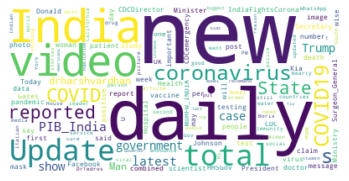

In [52]:
"""
Visualizing word cloud
"""
fake_tweet_Series = pd.Series(fake_train1['tweet'])
text = " ".join(cat.split()[1] for cat in fake_train1.tweet)
word_cloud = WordCloud(collocations=False, background_color='white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [50]:
"""
Named entity recognition
"""
print(hero.named_entities(s=fake_tweet_Series)[0:5])

/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning:

[W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.



0    [(CDC, ORG, 4, 7), (99031, CARDINAL, 26, 31), ...
1    [(1121, DATE, 16, 20), (last Tuesday, DATE, 46...
2                         [(nashville, GPE, 122, 131)]
3    [(IndiaFightsCorona, MONEY, 1, 18), (India, GP...
4    [(today, DATE, 92, 97), (9, CARDINAL, 98, 99),...
dtype: object


In [53]:
# Noun chunks [Group of consecutive words that belong together]
print(hero.noun_chunks(s=fake_tweet_Series)[0:5])

0    [(The CDC, NP, 0, 7), (99031 deaths, NP, 26, 3...
1    [(States, NP, 0, 6), (1121 deaths, NP, 16, 27)...
2    [(Politically Correct Woman, NP, 0, 25), (Pand...
3    [(We, NP, 20, 22), (1524 #COVID testing labora...
4    [(Populous states, NP, 0, 15), (large case cou...
dtype: object
